In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('dark')

import json
import os
import datetime

from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import cairosvg
from PIL import Image

In [12]:
with open("../configs/config.json", "r") as file:
    config = json.load(file)

# Виведення конфігурації
print(config)

{'data': {'raw_path': '../data/raw/svg', 'processed_path': '../data/precessed/png_images', 'class_names': ['airplane', 'alarm clock', 'angel', 'ant', 'apple', 'arm', 'armchair', 'ashtray', 'axe', 'backpack', 'banana', 'barn', 'baseball bat', 'basket', 'bathtub', 'bear (animal)', 'bed', 'bee', 'beer-mug', 'bell', 'bench', 'bicycle', 'binoculars', 'blimp', 'book', 'bookshelf', 'boomerang', 'bottle opener', 'bowl', 'brain', 'bread', 'bridge', 'bulldozer', 'bus', 'bush', 'butterfly', 'cabinet', 'cactus', 'cake', 'calculator', 'camel', 'camera', 'candle', 'cannon', 'canoe', 'car (sedan)', 'carrot', 'castle', 'cat', 'cell phone', 'chair', 'chandelier', 'church', 'cigarette', 'cloud', 'comb', 'computer monitor', 'computer-mouse', 'couch', 'cow', 'crab', 'crane (machine)', 'crocodile', 'crown', 'cup', 'diamond', 'dog', 'dolphin', 'donut', 'door', 'door handle', 'dragon', 'duck', 'ear', 'elephant', 'envelope', 'eye', 'eyeglasses', 'face', 'fan', 'feather', 'fire hydrant', 'fish', 'flashlight', 

In [13]:
# Constants
IMAGE_SIZE = (config['model']['input_size'], config['model']['input_size'])
BATCH_SIZE = config['model']['batch_size']
NUM_CLASSES = config['model']['output_size']
DATA_DIR = config['data']['raw_path']
OUTPUT_DIR = config['data']['processed_path']

In [14]:
# from PIL import Image

# def convert_svg_to_png(svg_path, png_path):
#     """Конвертує SVG у PNG з обробкою альфа-каналу."""
#     try:
#         # Конвертація SVG у PNG за допомогою cairosvg
#         cairosvg.svg2png(url=svg_path, write_to=png_path)
        
#         # Відкриття PNG і перетворення на RGB з білим фоном
#         image = Image.open(png_path)
#         if image.mode == 'RGBA':
#             background = Image.new('RGB', image.size, (255, 255, 255))
#             background.paste(image, mask=image.split()[-1])  # Використовуємо альфа-канал як маску
#             image = background
#         image.save(png_path)  # Зберігаємо оновлене зображення
#         return True
#     except Exception as e:
#         print(f"Помилка конвертації {svg_path}: {e}")
#         return False

# def preprocess_dataset(data_dir, output_dir):
#     """Convert all SVGs in the dataset to PNGs and save them in the output directory."""
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)

#     for category in os.listdir(data_dir):
#         category_dir = os.path.join(data_dir, category)
#         if os.path.isdir(category_dir):
#             output_category_dir = os.path.join(output_dir, category)
#             os.makedirs(output_category_dir, exist_ok=True)

#             for svg_file in os.listdir(category_dir):
#                 if svg_file.endswith(".svg"):
#                     svg_path = os.path.join(category_dir, svg_file)
#                     png_path = os.path.join(output_category_dir, svg_file.replace(".svg", ".png"))
#                     success = convert_svg_to_png(svg_path, png_path)
#                     if not success:
#                         print(f"Skipping {svg_path} due to conversion error.")

# # Convert SVGs to PNGs (only need to do this once)
# preprocess_dataset(DATA_DIR, OUTPUT_DIR)

In [15]:
import os

# Шлях до директорії з даними

# Отримання списку класів
class_names = sorted(os.listdir(OUTPUT_DIR))
class_names

['airplane',
 'alarm clock',
 'angel',
 'ant',
 'apple',
 'arm',
 'armchair',
 'ashtray',
 'axe',
 'backpack',
 'banana',
 'barn',
 'baseball bat',
 'basket',
 'bathtub',
 'bear (animal)',
 'bed',
 'bee',
 'beer-mug',
 'bell',
 'bench',
 'bicycle',
 'binoculars',
 'blimp',
 'book',
 'bookshelf',
 'boomerang',
 'bottle opener',
 'bowl',
 'brain',
 'bread',
 'bridge',
 'bulldozer',
 'bus',
 'bush',
 'butterfly',
 'cabinet',
 'cactus',
 'cake',
 'calculator',
 'camel',
 'camera',
 'candle',
 'cannon',
 'canoe',
 'car (sedan)',
 'carrot',
 'castle',
 'cat',
 'cell phone',
 'chair',
 'chandelier',
 'church',
 'cigarette',
 'cloud',
 'comb',
 'computer monitor',
 'computer-mouse',
 'couch',
 'cow',
 'crab',
 'crane (machine)',
 'crocodile',
 'crown',
 'cup',
 'diamond',
 'dog',
 'dolphin',
 'donut',
 'door',
 'door handle',
 'dragon',
 'duck',
 'ear',
 'elephant',
 'envelope',
 'eye',
 'eyeglasses',
 'face',
 'fan',
 'feather',
 'fire hydrant',
 'fish',
 'flashlight',
 'floor lamp',
 'flower

Шлях до зображення: ../data/precessed/png_images/rainbow/13534.png
Режим зображення: RGB
Розмір зображення: (800, 800)
Мінімальне значення пікселя: 0
Максимальне значення пікселя: 255
Середнє значення пікселя: 249.3554921875


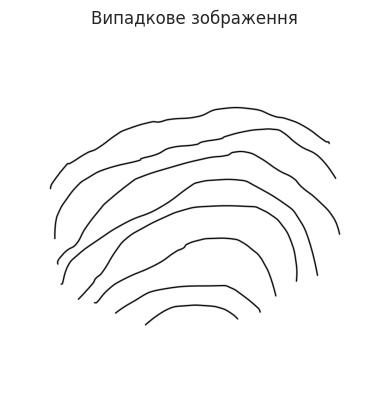

In [16]:
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Шлях до директорії з зображеннями

# Отримання списку всіх зображень
image_paths = []
for root, dirs, files in os.walk(OUTPUT_DIR):
    for file in files:
        if file.endswith(".png") or file.endswith(".jpg"):
            image_paths.append(os.path.join(root, file))

# Випадковий вибір зображення
random_image_path = random.choice(image_paths)

# Завантаження зображення
image = Image.open(random_image_path)

# Виведення інформації про зображення
print("Шлях до зображення:", random_image_path)
print("Режим зображення:", image.mode)
print("Розмір зображення:", image.size)

# Перетворення зображення в масив numpy
image_array = np.array(image)

# Виведення статистики пікселів
print("Мінімальне значення пікселя:", np.min(image_array))
print("Максимальне значення пікселя:", np.max(image_array))
print("Середнє значення пікселя:", np.mean(image_array))

# Відображення зображення
plt.imshow(image)
plt.axis("off")
plt.title("Випадкове зображення")
plt.show()

In [17]:
# # Створення генераторів даних
# train_datagen = ImageDataGenerator(
#     rescale=1.0 / 255.0,  # Нормалізація пікселів до [0, 1]
#     rotation_range=20,  # Випадкове обертання
#     width_shift_range=0.2,  # Випадковий зсув по горизонталі
#     height_shift_range=0.2,  # Випадковий зсув по вертикалі
#     shear_range=0.2,  # Випадкове зсування
#     zoom_range=0.2,  # Випадкове збільшення
#     horizontal_flip=True,  # Випадкове віддзеркалення по горизонталі
#     fill_mode="nearest",  # Заповнення відсутніх пікселів
#     validation_split=0.2  # Розділення даних на навчання/валідацію
# )

# train_generator = train_datagen.flow_from_directory(
#     OUTPUT_DIR,
#     target_size=IMAGE_SIZE,
#     batch_size=BATCH_SIZE,
#     class_mode="categorical",
#     color_mode="rgb",  # Використовуємо RGB
#     subset="training"  # Для навчання
# )

# val_generator = train_datagen.flow_from_directory(
#     OUTPUT_DIR,
#     target_size=IMAGE_SIZE,
#     batch_size=BATCH_SIZE,
#     class_mode="categorical",
#     color_mode="rgb",  # Використовуємо RGB
#     subset="validation"  # Для валідації
# )

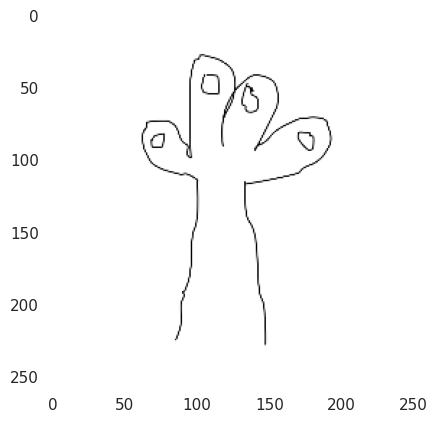

In [18]:
import pathlib
data_dir = pathlib.Path(OUTPUT_DIR)
images = list(data_dir.glob('*/*.png')) + list(data_dir.glob('*/*.jpg'))
images = [str(path) for path in images]
labels = [os.path.basename(os.path.dirname(path)) for path in images]
label_to_index = {name: index for index, name in enumerate(sorted(set(labels)))}
labels = [label_to_index[label] for label in labels]
tio = tf.io.read_file(images[0])
# plt.imshow(tio)
tio = tf.image.decode_png(tio, channels=0)
tio = tf.image.resize(tio, IMAGE_SIZE)
tio = tf.cast(tio, tf.float32) / 255.0
plt.imshow(tio)

In [36]:
# def create_dataset(data_dir, is_training=True):
#     data_dir = pathlib.Path(data_dir)
    
#     # Lazy loading of files
#     ds = tf.data.Dataset.list_files(str(data_dir / '*/*.png'), shuffle=is_training)
    
#     # Function to parse file paths and labels
#     def parse_file(file_path):
#         # Extract label from file path
#         parts = tf.strings.split(file_path, os.sep)
#         label = parts[-2]
#         return file_path, label

#     ds = ds.map(parse_file, num_parallel_calls=tf.data.AUTOTUNE)

#     # Create a lookup table for labels
#     unique_labels = sorted([item.name for item in data_dir.glob('*') if item.is_dir()])
#     label_to_index = {name: index for index, name in enumerate(unique_labels)}
#     num_classes = len(unique_labels)

#     def preprocess_image(file_path, label):
#         # Load and preprocess the image
#         img = tf.io.read_file(file_path)
#         img = tf.image.decode_image(img, channels=3, expand_animations=False)
#         img = tf.image.resize(img, IMAGE_SIZE)
#         img = tf.cast(img, tf.float32) / 255.0
        
#         # Convert label to one-hot encoding
#         label = tf.convert_to_tensor(label_to_index[label.numpy().decode()], dtype=tf.int32)
#         label = tf.one_hot(label, depth=num_classes)
#         return img, label

#     # Wrap preprocess_image for graph execution
#     def preprocess_wrapper(file_path, label):
#         return tf.py_function(preprocess_image, [file_path, label], [tf.float32, tf.float32])

#     ds = ds.map(preprocess_wrapper, num_parallel_calls=tf.data.AUTOTUNE)

#     if is_training:
#         # Data augmentation function
#         def augment(image, label):
#             # Random scaling
#             scale = tf.random.uniform([], 1.0, 1.1, dtype=tf.float32)
#             new_height = tf.cast(tf.shape(image)[0] * scale, tf.int32)
#             new_width = tf.cast(tf.shape(image)[1] * scale, tf.int32)

#             # Resize to scaled dimensions
#             image = tf.image.resize(image, [new_height, new_width])

#             # Ensure cropping retains correct dimensions
#             image = tf.image.random_crop(image, size=[IMAGE_SIZE[0], IMAGE_SIZE[1], 3])

#             # Additional augmentations
#             image = tf.image.random_flip_left_right(image)

#             return image, label

        
#         ds = ds.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
#         ds = ds.shuffle(buffer_size=1000).repeat()

#     # Batch and prefetch the data
#     ds = ds.batch(BATCH_SIZE)
#     ds = ds.prefetch(tf.data.AUTOTUNE)

#     return ds

# # Створення наборів даних для навчання та валідації
# train_ds = create_dataset(OUTPUT_DIR, is_training=True)
# val_ds = create_dataset(OUTPUT_DIR, is_training=False)

# # Визначаємо кількість кроків на епоху
# steps_per_epoch = len(images) // BATCH_SIZE

# # Виведення інформації про набори даних
# print("Train dataset:", train_ds)
# print("Validation dataset:", val_ds)
# print("Steps per epoch:", steps_per_epoch)

TypeError: in user code:

    File "/tmp/ipykernel_13405/89471100.py", line 44, in augment  *
        new_height = tf.cast(tf.shape(image)[0] * scale, tf.int32)

    TypeError: Input 'y' of 'Mul' Op has type float32 that does not match type int32 of argument 'x'.


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom, RandomTranslation

INPUT_SHAPE = IMAGE_SIZE + (3,)  # For 3-channel RGB images

# Define augmentation model
def create_augmentation_model():
    augmentation_model = Sequential([
        Rescaling(1.0 / 255.0),  # Normalize images to [0, 1]
        RandomFlip("horizontal"),  # Randomly flip horizontally
        RandomRotation(0.1),  # Random rotation, max 10%
        RandomZoom(0.1, 0.1),  # Random zoom: 10%
        RandomTranslation(0.1, 0.1),  # Random translation: 10%
        tf.keras.layers.Resizing(*IMAGE_SIZE),  # Ensure all images are resized
    ])
    return augmentation_model

# Instantiate the augmentation model
augmentation_model = create_augmentation_model()

# Test on a batch of images
sample_image = tf.random.uniform(shape=(1, 200, 200, 3))  # Example input
augmented_image = augmentation_model(sample_image)

print("Original shape:", sample_image.shape)
print("Augmented shape:", augmented_image.shape)


In [ ]:
def preprocess_image(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    return img, label

def augment_image(image, label, augmentation_model):
    # Apply augmentation using the model
    image = augmentation_model(image)
    return image, label

# Apply the augmentation model in your dataset
def create_dataset(data_dir, augmentation_model, is_training=True):
    data_dir = pathlib.Path(data_dir)
    
    # Collect image paths and labels
    images = list(data_dir.glob('*/*.png')) + list(data_dir.glob('*/*.jpg'))
    images = [str(path) for path in images]
    labels = [os.path.basename(os.path.dirname(path)) for path in images]
    
    # Create label dictionary
    label_to_index = {name: index for index, name in enumerate(sorted(set(labels)))}
    labels = [label_to_index[label] for label in labels]
    labels = tf.keras.utils.to_categorical(labels, num_classes=len(label_to_index))
    
    # Create tf.data.Dataset
    ds = tf.data.Dataset.from_tensor_slices((images, labels))
    ds = ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    
    if is_training:
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.map(lambda image, label: augment_image(image, label, augmentation_model),
                    num_parallel_calls=tf.data.AUTOTUNE)
    
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    
    return ds

# Example usage
augmentation_model = create_augmentation_model()
train_ds = create_dataset("../data/processed/png_images/", augmentation_model, is_training=True)


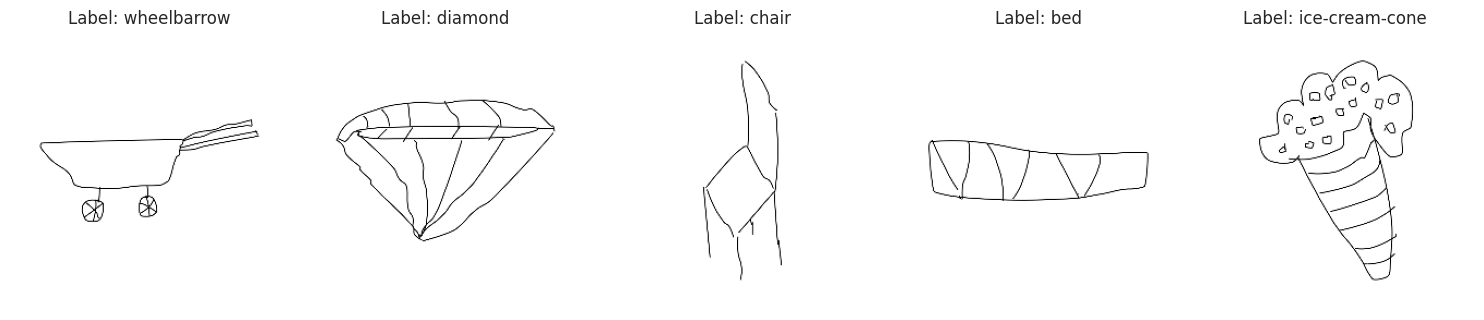

In [34]:
def show_first_5_images(dataset):
    plt.figure(figsize=(15, 5))
    for images, labels in dataset.take(1):
        for i in range(5):
            ax = plt.subplot(1, 5, i + 1)
            plt.imshow(images[i].numpy())
            # Знаходимо індекс класу з one-hot encoding
            label_index = np.argmax(labels[i].numpy())
            plt.title(f"Label: {class_names[label_index]}")
            plt.axis("off")
    plt.tight_layout()
    plt.show()

# Використання функції
show_first_5_images(train_ds)

In [11]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(
    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),  # Розмір вхідних зображень
    include_top=False,  # Виключаємо верхній шар (класифікатор)
    weights="imagenet"  # Використовуємо попередньо навчені ваги
)

/tmp/ipykernel_61048/1808916435.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Заморожуємо базову модель (щоб не навчати її заново)
base_model.trainable = False

# Додавання власних шарів для класифікації
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)

# Створення моделі
model = Model(inputs=base_model.input, outputs=outputs)

# Компіляція моделі
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Оптимізатор з низьким learning rate
    loss="categorical_crossentropy",  # Функція втрат для багатокласової класифікації
    metrics=["accuracy"]  # Метрика для оцінки
)

: 

In [62]:
# Навчання моделі
history = model.fit(
    train_ds,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=val_ds,
    validation_steps=len(val_ds)
)

Epoch 1/10


I0000 00:00:1737050636.246386   61189 service.cc:148] XLA service 0x7f67b0001d50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737050636.247160   61189 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2025-01-16 18:03:56.590242: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737050637.251504   61189 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-16 18:03:58.329974: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2003_0', 104 bytes spill stores, 136 bytes spill loads

2025-01-16 18:03:58.587250: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2003', 1

  3/624 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.0122 - loss: 5.4819       

I0000 00:00:1737050648.251862   61189 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


107/624 ━━━━━━━━━━━━━━━━━━━━ 30s 59ms/step - accuracy: 0.1128 - loss: 4.6079

In [143]:
# Розморожуємо частину шарів базової моделі
for layer in base_model.layers[:100]:  # Розморожуємо перші 100 шарів
    layer.trainable = False
for layer in base_model.layers[100:]:  # Залишаємо замороженими решту шарів
    layer.trainable = True

# Повторна компіляція моделі для fine-tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Ще нижчий learning rate
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Fine-tuning
history_fine = model.fit(
    train_ds,
    steps_per_epoch=steps_per_epoch,
    epochs=5,
    validation_data=val_ds,
    validation_steps=len(val_ds)
)

# 500/500 ━━━━━━━━━━━━━━━━━━━━ 283s 567ms/step - accuracy: 0.5612 - loss: 1.6924 - val_accuracy: 0.6137 - val_loss: 1.5140

Epoch 1/5


2025-01-15 16:28:23.509444: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8124', 104 bytes spill stores, 104 bytes spill loads



500/500 ━━━━━━━━━━━━━━━━━━━━ 316s 592ms/step - accuracy: 0.2695 - loss: 3.3645 - val_accuracy: 0.5270 - val_loss: 1.8767
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 282s 565ms/step - accuracy: 0.4584 - loss: 2.2027 - val_accuracy: 0.5668 - val_loss: 1.7416
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 282s 563ms/step - accuracy: 0.5035 - loss: 1.9762 - val_accuracy: 0.5794 - val_loss: 1.6471
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 285s 569ms/step - accuracy: 0.5328 - loss: 1.8327 - val_accuracy: 0.5910 - val_loss: 1.5892
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 283s 567ms/step - accuracy: 0.5612 - loss: 1.6924 - val_accuracy: 0.6137 - val_loss: 1.5140


In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
model.save(config['training']['final_model_dir'] + "model16.01MobileNetV2.h5")  # Збереження моделі